# Introdução

O avanço das tecnologias vestíveis, como smartwatches e dispositivos de monitoramento de fitness, proporcionou a coleta massiva de dados sobre atividades diárias e padrões de sono. Esses dados são amplamente utilizados por indivíduos preocupados com a saúde e o bem-estar, permitindo o monitoramento de variáveis como contagem de passos, calorias queimadas e duração do sono. A partir dessas informações, é possível aplicar técnicas de Ciência de Dados e Inteligência Artificial para gerar insights valiosos, como a previsão de riscos de sobrecarga física ou exaustão.

---

Neste trabalho, será utilizado o **Fitness Track Daily Activity Dataset in DS**, disponível no Kaggle. O dataset contém registros diários detalhados de atividades físicas e padrões de sono, incluindo atributos como:

-   **Contagem de passos**
-   **Calorias queimadas**
-   **Distância percorrida**
-   **Duração do sono**

Com base nessas informações, será realizada uma **análise exploratória dos dados**, buscando compreender as distribuições e possíveis correlações entre as variáveis de atividade e sono. Em seguida, será desenvolvida uma **Rede Neural Artificial (RNA)** do tipo **Multilayer Perceptron (MLP)**, com o objetivo de **prever o risco de sobrecarga ou exaustão** durante o acompanhamento diário.

Como o dataset não possui diretamente uma variável indicativa de sobrecarga ou exaustão, será criada uma **variável simulada** (`overload_risk`), com base em critérios que caracterizam estados de risco, como alta contagem de passos, calorias queimadas excessivas e baixa duração do sono.

---

A partir disso, serão conduzidas as seguintes etapas:

-   Pré-processamento e normalização dos dados
-   Criação e balanceamento da variável de risco
-   Treinamento da rede neural para **classificação binária** (`com risco` ou `sem risco`)
-   Avaliação do desempenho do modelo por meio de métricas como **precision**, **recall** e **F1-score**

Por fim, será discutida a eficácia do modelo, bem como suas possíveis aplicações práticas no monitoramento da saúde diária, contribuindo para a prevenção de estados de exaustão e a promoção de hábitos de vida mais equilibrados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Carregamento do dataset
df = pd.read_csv('./dataset/Fitness Track Daily Activity Dataset.csv')

In [3]:
# Pré-processamento Inicial e Limpeza de Dados

# Verificação inicial
print("Formato original:", df.shape)
print("\nInformações do DataFrame:")
df.info()
df.head()

Formato original: (940, 15)

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UserID                      940 non-null    int64  
 1   Date                        940 non-null    object 
 2   Total_Distance              940 non-null    float64
 3   Tracker_Distance            940 non-null    float64
 4   Logged_Activities_Distance  940 non-null    float64
 5   Very_Active_Distance        940 non-null    float64
 6   Moderately_Active_Distance  940 non-null    float64
 7   Light_Active_Distance       940 non-null    float64
 8   Sedentary_Active_Distance   940 non-null    float64
 9   Very_Active_Minutes         940 non-null    int64  
 10  Fairly_Active_Minutes       940 non-null    int64  
 11  Lightly_Active_Minutes      940 non-null    int64  
 12  Sedentary_Minutes           940 non-n

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


In [4]:
# Removendo linhas com quaisquer valores nulos (se houver, neste dataset não deve ter muitos)
df.dropna(inplace=True)
print("\nFormato após remoção de nulos (se houver):", df.shape)


Formato após remoção de nulos (se houver): (940, 15)


In [5]:
# A coluna 'UserID' não é diretamente útil para o modelo de classificação para essa analise
df = df.drop('UserID', axis=1)

In [6]:
# A coluna 'Date' não é diretamente útil para o modelo de classificação para essa analise
df = df.drop('Date', axis=1)

#  Análise Exploratória de Dados 


Estatísticas descritivas das variáveis numéricas:
       Total_Distance  Tracker_Distance  Logged_Activities_Distance  \
count      940.000000        940.000000                  940.000000   
mean         5.489702          5.475351                    0.108171   
std          3.924606          3.907276                    0.619897   
min          0.000000          0.000000                    0.000000   
25%          2.620000          2.620000                    0.000000   
50%          5.245000          5.245000                    0.000000   
75%          7.712500          7.710000                    0.000000   
max         28.030001         28.030001                    4.942142   

       Very_Active_Distance  Moderately_Active_Distance  \
count            940.000000                  940.000000   
mean               1.502681                    0.567543   
std                2.658941                    0.883580   
min                0.000000                    0.000000   
25%           

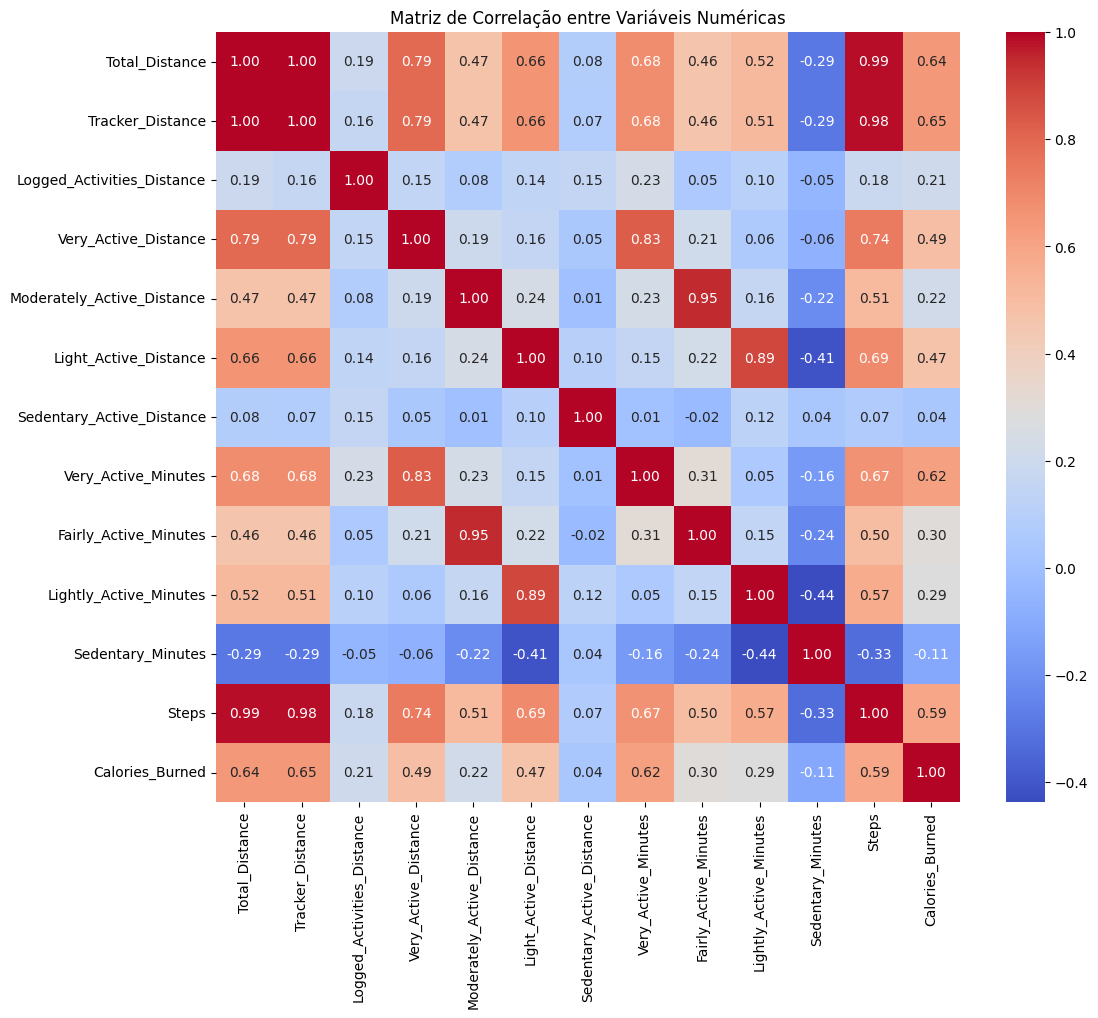

In [7]:
# Estatísticas descritivas para variáveis numéricas
print("\nEstatísticas descritivas das variáveis numéricas:")
print(df.describe())

# Matriz de Correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

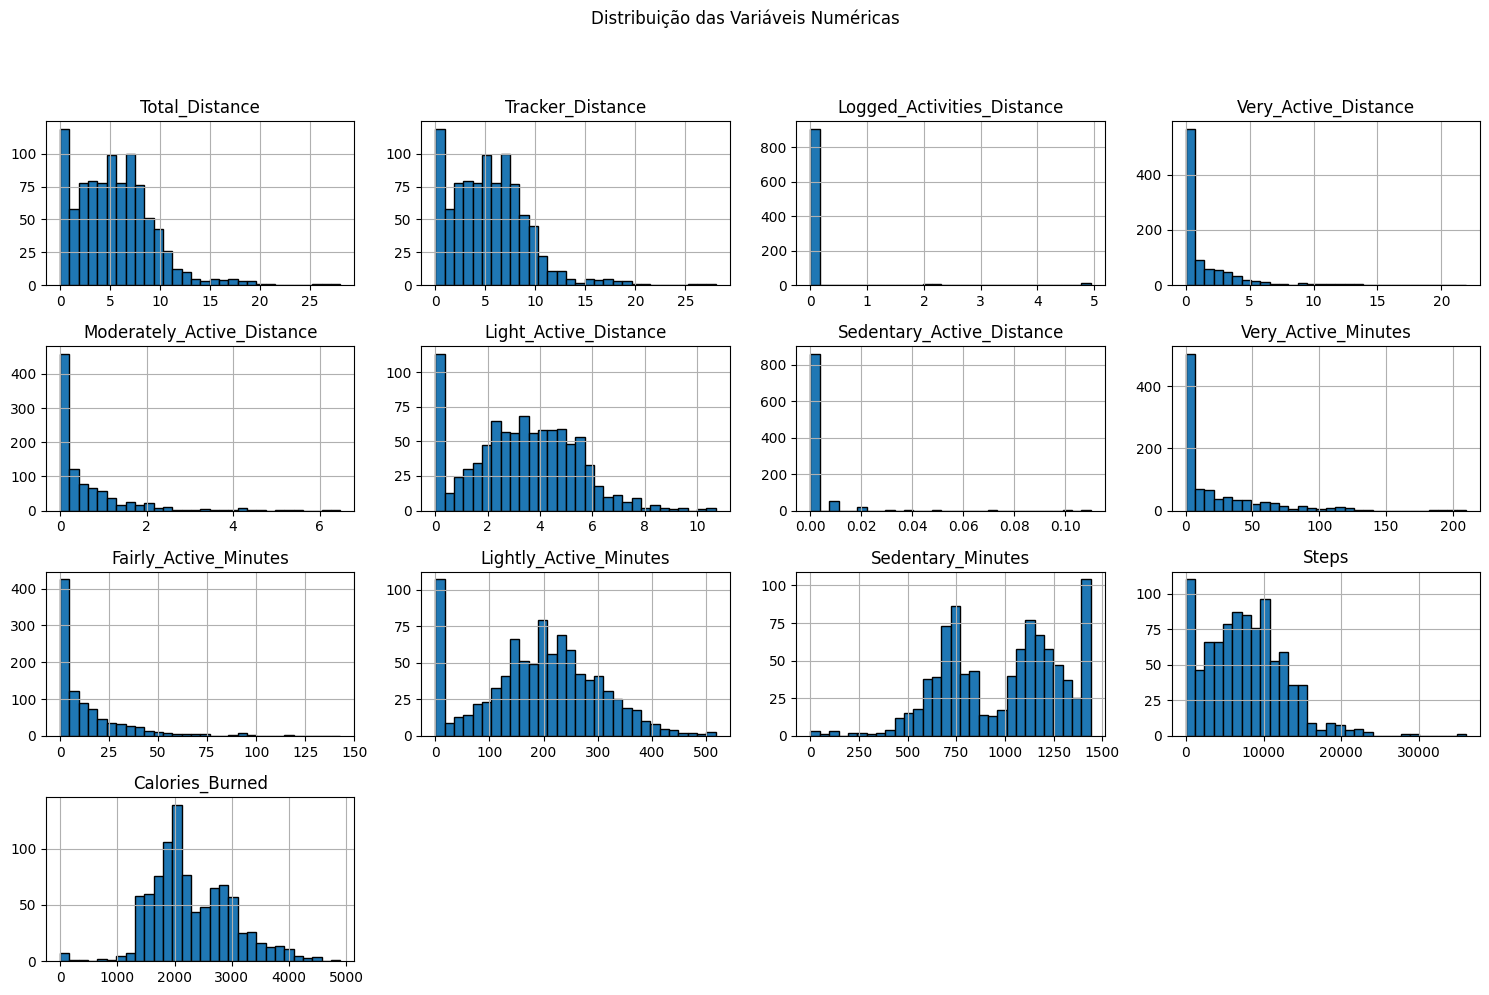

In [8]:
#Histograma para toddas as variaveis numéricas
df.hist(bins=30, figsize=(15, 10), edgecolor='k')
plt.suptitle("Distribuição das Variáveis Numéricas", y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


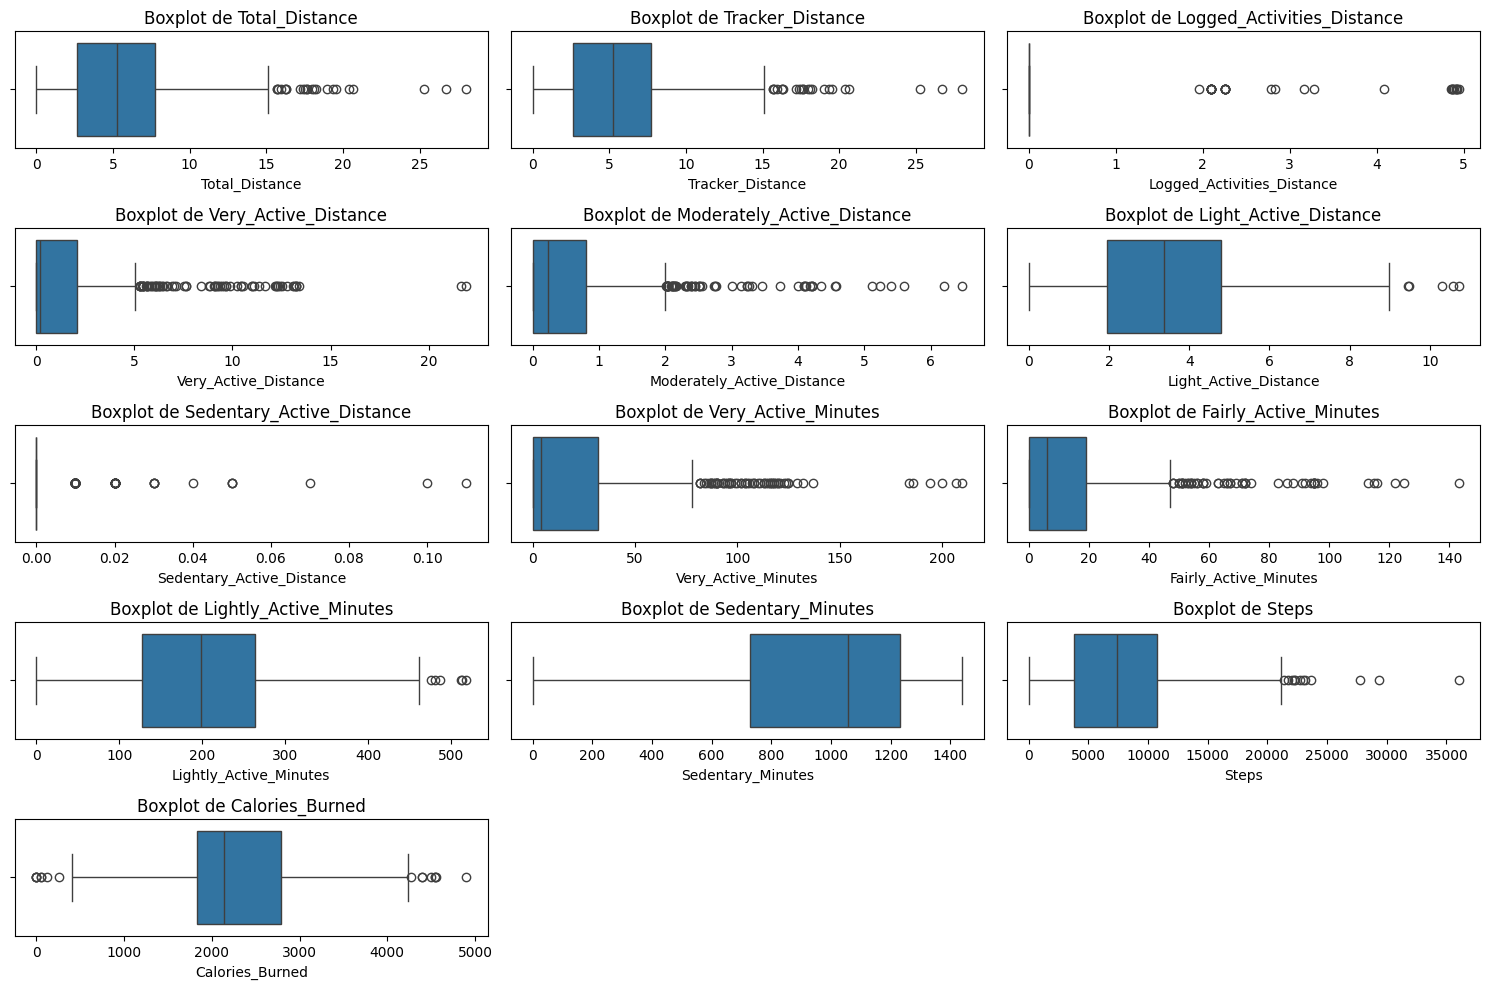

In [9]:
# Boxplot para identificar outliers -> refere-se a um dado que se desvia significativamente do padrão geral de um conjunto de dados.
num_cols_eda = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for idx, col in enumerate(num_cols_eda):
    plt.subplot(len(num_cols_eda) // 3 + 1, 3, idx + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()


# Criação da Variável 'overload_risk' (Variável Alvo)

Conceituação da variável 'overload_risk' (risco de sobrecarga/exaustão)
com base em critérios de atividade excessiva.
Estes são limiares simulados e devem ser ajustados com base em conhecimento de domínio.

# Assumimos que o risco de sobrecarga/exaustão é maior se:
- Calorias Queimadas (Calories_Burned) muito altas (e.g., acima de 3500 kcal por dia)
- Contagem de Passos (Steps) muito alta (e.g., acima de 17000 passos por dia)


In [ ]:
# vamos considerar apenas as condições de calorias queimadas e passos.
df['overload_risk'] = np.where(
    (df['Calories_Burned'] > 3500) |  # Calorias muito altas
    (df['Steps'] > 17000),            # Passos muito altos
    1,                                # Se qualquer condição for verdadeira, 'overload_risk' = 1
    0                                 # Caso contrário, 'overload_risk' = 0
)

In [11]:
print("\nContagem da variável 'overload_risk' (0: Sem Risco, 1: Com Risco):")
print(df['overload_risk'].value_counts())



Contagem da variável 'overload_risk' (0: Sem Risco, 1: Com Risco):
overload_risk
0    836
1    104
Name: count, dtype: int64


C:\Users\otavi\AppData\Local\Temp\ipykernel_32028\2908858272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overload_risk', data=df, palette='viridis')


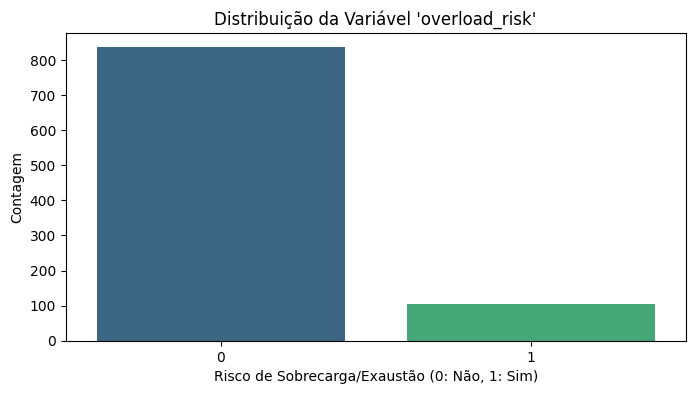

In [12]:
# Visualização do balanceamento da nova variável alvo
plt.figure(figsize=(8, 4))
sns.countplot(x='overload_risk', data=df, palette='viridis')
plt.title("Distribuição da Variável 'overload_risk'")
plt.xlabel("Risco de Sobrecarga/Exaustão (0: Não, 1: Sim)")
plt.ylabel("Contagem")
plt.show()

# Pré-processamento para o Modelo de Machine Learning 

In [13]:
# Separar colunas numéricas (para normalização) e categóricas (se houver, neste dataset não há)
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Remover 'overload_risk' da lista de colunas numéricas, pois é a variável alvo agora
if 'overload_risk' in num_cols:
    num_cols.remove('overload_risk')

print("\nColunas Numéricas para Normalização:", num_cols)
print("Colunas Categóricas para One-Hot Encoding:", cat_cols)



Colunas Numéricas para Normalização: ['Total_Distance', 'Tracker_Distance', 'Logged_Activities_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance', 'Light_Active_Distance', 'Sedentary_Active_Distance', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Sedentary_Minutes', 'Steps', 'Calories_Burned']
Colunas Categóricas para One-Hot Encoding: []


In [14]:
#Normalização dos dados numéricos usando MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("\nDataFrame após normalização das variáveis numéricas:")
print(df.head())



DataFrame após normalização das variáveis numéricas:
   Total_Distance  Tracker_Distance  Logged_Activities_Distance  \
0        0.286122          0.286122                         0.0   
1        0.207635          0.207635                         0.0   
2        0.003924          0.003924                         0.0   
3        0.257224          0.257224                         0.0   
4        0.280414          0.280414                         0.0   

   Very_Active_Distance  Moderately_Active_Distance  Light_Active_Distance  \
0              0.092609                    0.074074               0.515406   
1              0.104015                    0.138889               0.246499   
2              0.000000                    0.000000               0.010271   
3              0.000000                    0.052469               0.641457   
4              0.015511                    0.112654               0.633987   

   Sedentary_Active_Distance  Very_Active_Minutes  Fairly_Active_Minutes  

# Divisão dos Dados e Balanceamento de Classes 

In [15]:
# Definindo X (features) e y (target)
X = df.drop('overload_risk', axis=1)
y = df['overload_risk']

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # stratify=y é crucial para manter a proporção da classe
)

print(f"\nProporção da classe 'overload_risk' no conjunto de treino antes do balanceamento: {y_train.value_counts(normalize=True)}")



Proporção da classe 'overload_risk' no conjunto de treino antes do balanceamento: overload_risk
0    0.889628
1    0.110372
Name: proportion, dtype: float64


In [16]:
# Balanceamento da classe minoritária no conjunto de treino usando RandomOverSampler 
# é uma técnica eficaz para lidar com conjuntos de dados desbalanceados, onde uma classe é significativamente mais representada do que a outra
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print(f"\nProporção da classe 'overload_risk' no conjunto de treino APÓS balanceamento: {y_train_resampled.value_counts(normalize=True)}")
print(f"Formato de X_train_resampled após balanceamento: {X_train_resampled.shape}")


Proporção da classe 'overload_risk' no conjunto de treino APÓS balanceamento: overload_risk
0    0.5
1    0.5
Name: proportion, dtype: float64
Formato de X_train_resampled após balanceamento: (1338, 13)


# Treinamento da Rede Neural Artificial (MLPClassifier)

In [17]:
# Modelo MLPClassifier
# Ajustado para um dataset menor, com menos camadas ocultas e neurônios se necessário.
# early_stopping ajuda a evitar overfitting e parar o treinamento quando a performance não melhora.
mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 32), # Ajustei para um número menor de neurônios, pode ser otimizado
                        activation='relu',
                        solver='adam',
                        max_iter=1000,
                        random_state=42,
                        early_stopping=True,
                        learning_rate_init=0.001)

print("\nTreinamento do MLPClassifier ")
mlp_clf.fit(X_train_resampled, y_train_resampled)


Treinamento do MLPClassifier 


MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 32), max_iter=1000,
              random_state=42)

#  Avaliação do Desempenho do Modelo 


--- Avaliação do Modelo ---

Relatório de Classificação:
              precision    recall  f1-score   support

   Sem Risco       0.99      0.80      0.89       167
   Com Risco       0.38      0.95      0.54        21

    accuracy                           0.82       188
   macro avg       0.68      0.88      0.71       188
weighted avg       0.92      0.82      0.85       188


Matriz de Confusão:
[[134  33]
 [  1  20]]


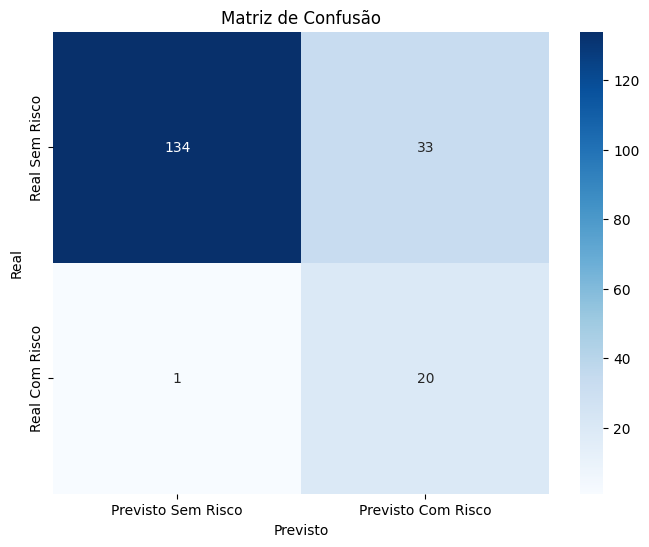


Detalhes da Matriz de Confusão:
True Negatives (TN): 134 - Casos que não eram risco e o modelo previu corretamente como sem risco.
False Positives (FP): 33 - Casos que não eram risco, mas o modelo previu erroneamente como com risco (alarme falso).
False Negatives (FN): 1 - Casos que eram risco, mas o modelo previu erroneamente como sem risco (risco não detectado).
True Positives (TP): 20 - Casos que eram risco e o modelo previu corretamente como com risco.


In [18]:
# Previsões no conjunto de teste
y_pred = mlp_clf.predict(X_test)

print("\n--- Avaliação do Modelo ---")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Sem Risco', 'Com Risco']))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto Sem Risco', 'Previsto Com Risco'],
            yticklabels=['Real Sem Risco', 'Real Com Risco'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Explicando a Matriz de Confusão:
print(f"\nDetalhes da Matriz de Confusão:")
print(f"True Negatives (TN): {cm[0, 0]} - Casos que não eram risco e o modelo previu corretamente como sem risco.")
print(f"False Positives (FP): {cm[0, 1]} - Casos que não eram risco, mas o modelo previu erroneamente como com risco (alarme falso).")
print(f"False Negatives (FN): {cm[1, 0]} - Casos que eram risco, mas o modelo previu erroneamente como sem risco (risco não detectado).")
print(f"True Positives (TP): {cm[1, 1]} - Casos que eram risco e o modelo previu corretamente como com risco.")

# Interface para utilizar dados inputados do usuário e usar o modelo para prever

In [19]:
def predict_overload_risk():
    print("\n=== Previsão de Risco de Sobrecarga/Exaustão ===")
    print("Por favor, insira os seguintes dados de atividade física:\n")
    
    try:
        # Coletar apenas as colunas essenciais
        data = {
            'Total_Distance': float(input("Distância total percorrida (km): ")),
            'Very_Active_Minutes': int(input("Minutos de atividade muito ativa: ")),
            'Fairly_Active_Minutes': int(input("Minutos de atividade moderadamente ativa: ")),
            'Lightly_Active_Minutes': int(input("Minutos de atividade levemente ativa: ")),
            'Sedentary_Minutes': int(input("Minutos sedentários: ")),
            'Steps': int(input("Número de passos: ")),
            'Calories_Burned': int(input("Calorias queimadas: "))
        }
        
        # Criar DataFrame com as colunas usadas no treinamento
        user_data = pd.DataFrame({
            'Total_Distance': [data['Total_Distance']],
            'Tracker_Distance': [data['Total_Distance'] * 0.95],  # Valor aproximado
            'Logged_Activities_Distance': [0],  # Valor padrão
            'Very_Active_Distance': [data['Very_Active_Minutes']/20],  # Aproximação
            'Moderately_Active_Distance': [data['Fairly_Active_Minutes']/15],  # Aproximação
            'Light_Active_Distance': [data['Lightly_Active_Minutes']/10],  # Aproximação
            'Sedentary_Active_Distance': [0],  # Valor padrão
            'Very_Active_Minutes': [data['Very_Active_Minutes']],
            'Fairly_Active_Minutes': [data['Fairly_Active_Minutes']],
            'Lightly_Active_Minutes': [data['Lightly_Active_Minutes']],
            'Sedentary_Minutes': [data['Sedentary_Minutes']],
            'Steps': [data['Steps']],
            'Calories_Burned': [data['Calories_Burned']]
        })
        
        # Aplicar o pré-processamento
        user_data_scaled = scaler.transform(user_data)
        
        # Fazer a predição
        prediction = mlp_clf.predict(user_data_scaled)
        prediction_proba = mlp_clf.predict_proba(user_data_scaled)
        
        # Exibir resultados (mesmo código anterior)
        print("\nResultado da Predição")
        if prediction[0] == 1:
            print("Risco de sobrecarga/exaustão: ALTO")
            print(f"Probabilidade: {prediction_proba[0][1]*100:.2f}%")
        else:
            print("Risco de sobrecarga/exaustão: BAIXO")
            print(f"Probabilidade: {prediction_proba[0][0]*100:.2f}%")
            
    except ValueError:
        print("\nErro: Por favor, insira valores numéricos válidos.")
    except Exception as e:
        print(f"\nErro durante a predição: {str(e)}")

predict_overload_risk()


=== Previsão de Risco de Sobrecarga/Exaustão ===
Por favor, insira os seguintes dados de atividade física:


Resultado da Predição
Risco de sobrecarga/exaustão: BAIXO
Probabilidade: 50.58%


c:\Users\otavi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\otavi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [20]:
print("\n--- Resultados e Próximos Passos ---")
print("O modelo foi treinado para classificar o risco de sobrecarga/exaustão (0: Sem Risco, 1: Com Risco).")
print("Um alto 'Recall' para a classe 'Com Risco' é importante, pois significa que o modelo consegue identificar a maioria dos casos de risco reais, minimizando os falsos negativos (riscos não detectados).")
print("No entanto, um alto 'Precision' para 'Com Risco' também é desejável para evitar alarmes falsos (falsos positivos), que poderiam gerar preocupação desnecessária.")
print("Avaliando a matriz de confusão, podemos ver o balanço entre FPs e FNs.")
print("Como este dataset não possui dados fisiológicos diretos, a variável 'overload_risk' é uma simulação.")
print("Para um cenário real, dados mais detalhados e a validação de especialistas seriam essenciais.")


--- Resultados e Próximos Passos ---
O modelo foi treinado para classificar o risco de sobrecarga/exaustão (0: Sem Risco, 1: Com Risco).
Um alto 'Recall' para a classe 'Com Risco' é importante, pois significa que o modelo consegue identificar a maioria dos casos de risco reais, minimizando os falsos negativos (riscos não detectados).
No entanto, um alto 'Precision' para 'Com Risco' também é desejável para evitar alarmes falsos (falsos positivos), que poderiam gerar preocupação desnecessária.
Avaliando a matriz de confusão, podemos ver o balanço entre FPs e FNs.
Como este dataset não possui dados fisiológicos diretos, a variável 'overload_risk' é uma simulação.
Para um cenário real, dados mais detalhados e a validação de especialistas seriam essenciais.
